In [156]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler

# 🟢 Bước 1: Tải mô hình đã train
model_path = "/home/phung/jnotebook/source/Tuan8/Model/AAPL_Close.keras"
model = tf.keras.models.load_model(model_path)

# 🟢 Bước 2: Tải dữ liệu từ Yahoo Finance
ticker = "AAPL"  # Thay đổi mã cổ phiếu nếu cần
n_past_days = 60  # Sử dụng 60 ngày gần nhất để dự đoán
future_days = 7   # Dự đoán 3 ngày tiếp theo

# Lấy dữ liệu từ Yahoo Finance
today = pd.to_datetime("2025-01-9")  # Ngày hiện tại (có thể thay đổi)
start_date = today - pd.Timedelta(days=n_past_days + 30)  # Lấy thêm để đảm bảo đủ dữ liệu
df = yf.download(ticker, start=start_date, end=today)

# 🟢 Bước 3: Chuẩn bị dữ liệu đầu vào
scaler = MinMaxScaler(feature_range=(0, 1))
close_prices = df["Close"].values.reshape(-1, 1)
close_prices_scaled = scaler.fit_transform(close_prices)




[*********************100%***********************]  1 of 1 completed


In [158]:
x_input = close_prices_scaled[-n_past_days:].reshape(1, n_past_days, 1)

In [160]:
future_predictions = []
for i in range(future_days):
    next_day_pred = model.predict(x_input)
    next_day_pred_real = scaler.inverse_transform(next_day_pred)[0][0]
    future_predictions.append(next_day_pred_real)

    # Cập nhật dữ liệu đầu vào
    x_input = np.append(x_input[:, 1:, :], next_day_pred.reshape(1, 1, 1), axis=1)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [161]:
for i in range(future_days):
    future_date = today + pd.Timedelta(days=i+1)
    print(f"Dự đoán giá {ticker} ngày {future_date.strftime('%d/%m/%Y')}: {future_predictions[i]:.2f}")

Dự đoán giá AAPL ngày 10/01/2025: 242.21
Dự đoán giá AAPL ngày 11/01/2025: 241.43
Dự đoán giá AAPL ngày 12/01/2025: 241.38
Dự đoán giá AAPL ngày 13/01/2025: 241.76
Dự đoán giá AAPL ngày 14/01/2025: 242.33
Dự đoán giá AAPL ngày 15/01/2025: 242.90
Dự đoán giá AAPL ngày 16/01/2025: 243.36


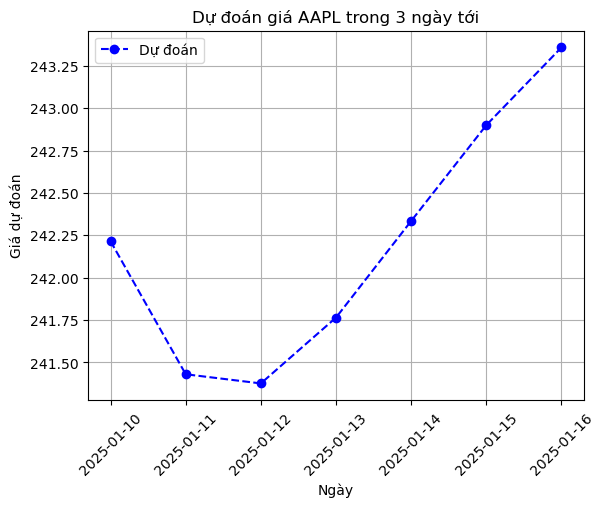

In [164]:
dates = [today + pd.Timedelta(days=i+1) for i in range(future_days)]
plt.plot(dates, future_predictions, marker='o', linestyle='dashed', color='b', label="Dự đoán")
plt.xlabel("Ngày")
plt.ylabel("Giá dự đoán")
plt.title(f"Dự đoán giá {ticker} trong 3 ngày tới")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

In [166]:
actual_start_date = "2025-01-10"
actual_end_date = "2025-01-17"
df_actual = yf.download(ticker, start=actual_start_date, end=actual_end_date)

[*********************100%***********************]  1 of 1 completed


ValueError: x and y must have same first dimension, but have shapes (45,) and (7,)

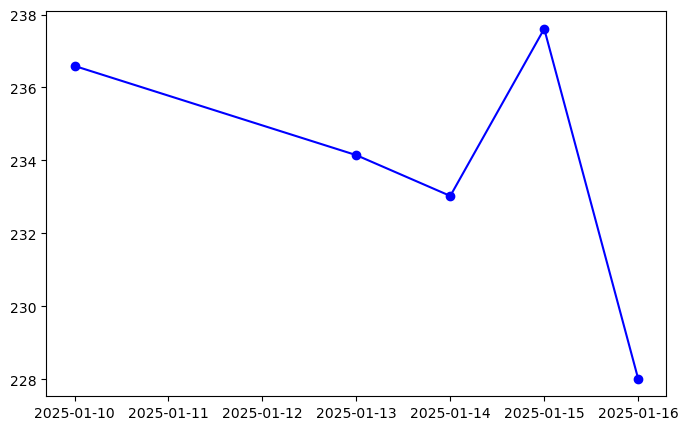

In [168]:
plt.figure(figsize=(8, 5))

# Vẽ dữ liệu thực tế (màu xanh)
plt.plot(df_actual.index, df_actual["Close"], marker='o', linestyle='-', color='b', label="Giá thực tế")

# Vẽ dữ liệu dự đoán (màu đỏ)
plt.plot(future_dates, future_predictions, marker='s', linestyle='dashed', color='r', label="Dự đoán")

plt.xlabel("Ngày")
plt.ylabel("Giá cổ phiếu (USD)")
plt.title(f"Giá thực tế vs. dự đoán của {ticker} từ 10/01/2025 đến 16/01/2025")
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# 🟢 Bước 7: Hiển thị biểu đồ
plt.show()